In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [90]:
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
#Data Reading
df=pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [93]:
y=df[["Y"]]
X=df.drop(["Y"],axis=1)

In [94]:
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [95]:
y.head()

,Y
0,0
1,0
2,1
3,0
4,0


In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=89)

In [152]:
#Logistic Regression
LR=LogisticRegression().fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred)

0.65625

In [154]:
#KNN
KNN=KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [155]:
accuracy_score(y_test,y_pred)

0.65625

In [304]:
#Decision Tree
dt=DecisionTreeClassifier().fit(X_train,y_train)
y=dt.predict(X_test)

In [305]:
accuracy_score(y_test,y_pred)

0.59375

In [306]:
dt_params={ "max_depth":np.arange(10,100,20),"min_samples_split":np.arange(2,100,10),"min_samples_leaf":np.arange(2,100,10)}

In [307]:
dt_cv_model=GridSearchCV(dt,dt_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2950 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    7.5s finished


In [309]:
dt_cv_model.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 32}

In [310]:
dt_cv_model.best_score_

0.6382978723404256

In [311]:
dt_tuned=DecisionTreeClassifier(max_depth=50,min_samples_leaf=40,min_samples_split=32).fit(X_train,y_train)
dt_tuned_pred=dt_tuned.predict(X_test)

In [312]:
accuracy_score(dt_tuned_pred,y_test)

0.6875

In [313]:
#MLP
mlp=MLPClassifier().fit(X_train,y_train)
y_pred=mlp.predict(X_test)

In [314]:
accuracy_score(y_test,y_pred)

0.59375

In [315]:
mlp_params={"hidden_layer_sizes":[[100,100],[5,5],[15,15],[50,50]],"alpha":[0.0001,0.01,1],"learning_rate_init":[0.0001,0.01,0.1,1]}

In [316]:
mlp_model_cv=GridSearchCV(mlp,mlp_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    8.0s finished


In [318]:
mlp_model_cv.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': [15, 15], 'learning_rate_init': 0.0001}

In [ ]:
mlp_model_cv.best_score_

In [319]:
mlp_tuned=MLPClassifier(max_iter=1000,solver="lbfgs",alpha= 0.01, activation="logistic",learning_rate='constant',learning_rate_init= 0.0001,hidden_layer_sizes=[15,15]).fit(X_train,y_train)
mlp_tuned_pred=mlp_tuned.predict(X_test)

In [324]:
print("MLP accuracy score is ",accuracy_score(mlp_tuned_pred,y_test))

MLP accuracy score is  0.75


In [ ]:
#As conclusion ,the best algorithm to forecast is MultiLayer Perceptron.I could  reach up %75 accuracy score .I believe that if I had more data,it could reach up more accuracy score. 

In [156]:
#Random Forest
rf=RandomForestClassifier().fit(X_train,y_train)
y_pred=rf.predict(X_test)


In [157]:
accuracy_score(y_test,y_pred)

0.65625

In [20]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. v

In [67]:
rf_params={"n_estimators":np.arange(1,500,20),
"max_depth":np.arange(1,100,10),"max_features":["sqrt","auto"]}
rf_cv_model=GridSearchCV(rf,rf_params,n_jobs=-1,verbose=2,cv=10).fit(X_train,y_train)
rf_cv_model

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 735 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 1030 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 1419 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2523 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3050 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3657 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4444 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  3.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [158]:
rf_cv_model.best_params_

{'max_depth': 71, 'max_features': 'sqrt', 'n_estimators': 1}

In [159]:
rf_cv_model.best_score_

0.648936170212766

In [160]:
rf_tuned=RandomForestClassifier(n_estimators=1, max_depth=71,max_features="sqrt").fit(X_train,y_train)
y_pred_tuned=rf_tuned.predict(X_test)

In [161]:
accuracy_score(y_pred_tuned,y_test)

0.71875

In [322]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},index=X_train.columns)

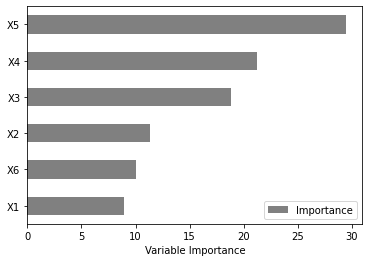

In [323]:
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",
                                                                  color="grey")
plt.xlabel("Variable Importance")
plt.gca().legend=None

In [ ]:
#According to the graph, the most important variable on target attribute is X5.